In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from ipyparallel import Client

The Client object provides a contect to interact with the engines in our IPython cluster

In [3]:
c = Client()

Each engine is another python interpreter.  Names spaces have to be managed explicitly. 
How to import to all engines:

In [4]:
with c[:].sync_imports():
    import numpy

importing numpy on engine(s)


Execution on the engines defaults to "non-blocking" or asynchronous behaviour

In [5]:
c.block = False

This call returns immediately ... 

In [6]:
%timeit c[:].execute("a = numpy.arange(0,1e7,0.1)")

100 loops, best of 3: 3.44 ms per loop


Now let's force it to complete before returning ... 

In [7]:
c.block = True

In [8]:
%timeit c[:].execute("a = numpy.arange(0,1e7,0.1)")

The slowest run took 352.47 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 539 ms per loop


Engine namespaces can be accessed by dictionary lookup from the Client object

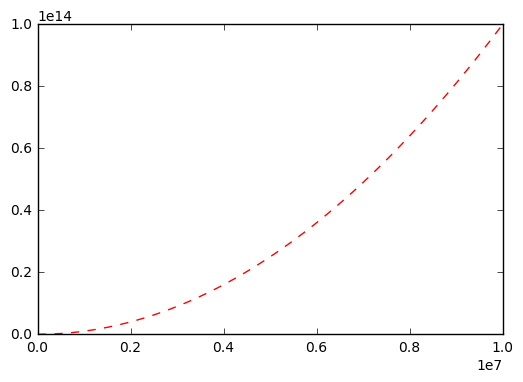

In [10]:
plot(c[0]['a'], c[1]['a']*c[2]['a'],'r--')

The parallel "magic" allows commands to be executed on all engines

In [11]:
%px a = numpy.arange(0,10,0.1)

Since engines are IPython as well, you can even run magics remotely

In [12]:
%px %pylab inline

[stdout:0] Populating the interactive namespace from numpy and matplotlib
[stdout:1] Populating the interactive namespace from numpy and matplotlib
[stdout:2] Populating the interactive namespace from numpy and matplotlib
[stdout:3] Populating the interactive namespace from numpy and matplotlib
[stdout:4] Populating the interactive namespace from numpy and matplotlib
[stdout:5] Populating the interactive namespace from numpy and matplotlib
[stdout:6] Populating the interactive namespace from numpy and matplotlib
[stdout:7] Populating the interactive namespace from numpy and matplotlib
[stdout:8] Populating the interactive namespace from numpy and matplotlib
[stdout:9] Populating the interactive namespace from numpy and matplotlib
[stdout:10] Populating the interactive namespace from numpy and matplotlib
[stdout:11] Populating the interactive namespace from numpy and matplotlib
[stdout:12] Populating the interactive namespace from numpy and matplotlib
[stdout:13] Populating the interact

[output:0]

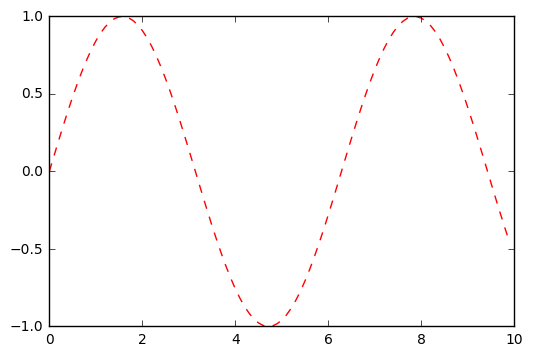

[output:1]

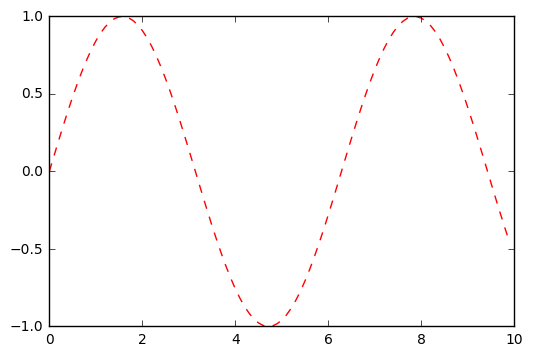

[output:2]

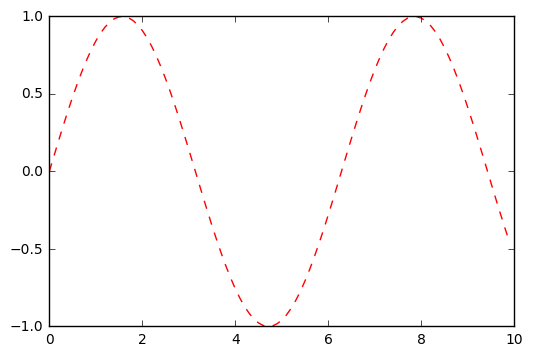

[output:3]

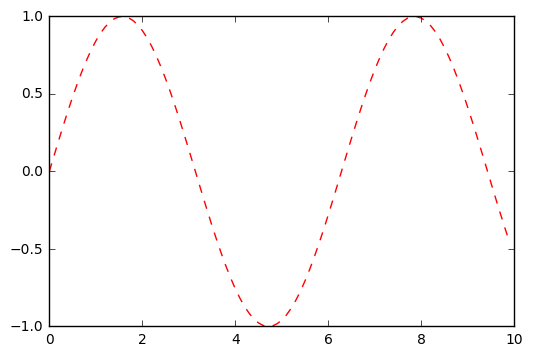

[output:4]

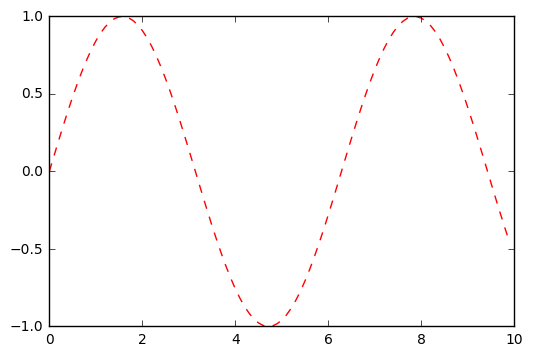

[output:5]

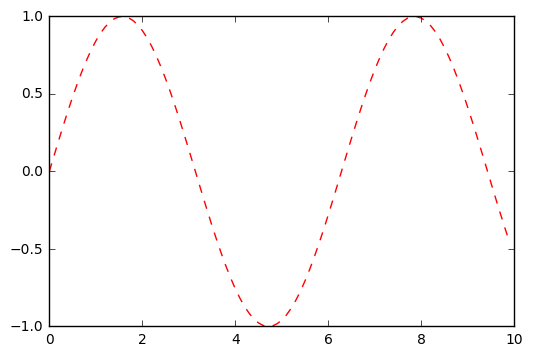

[output:6]

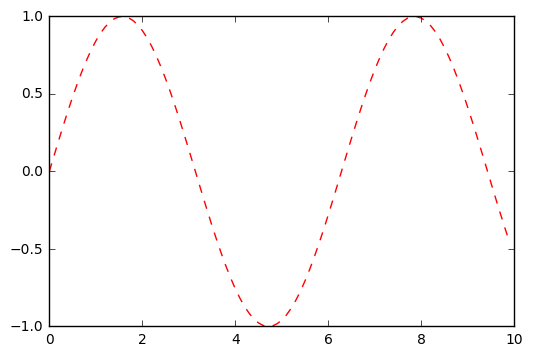

[output:7]

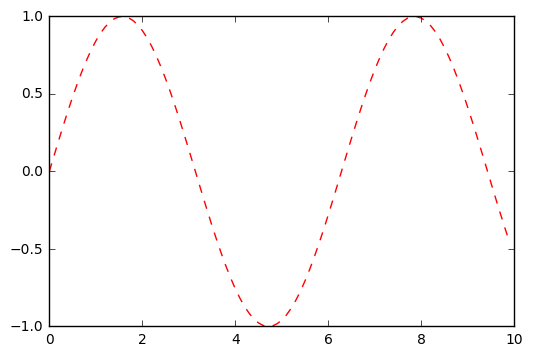

[output:8]

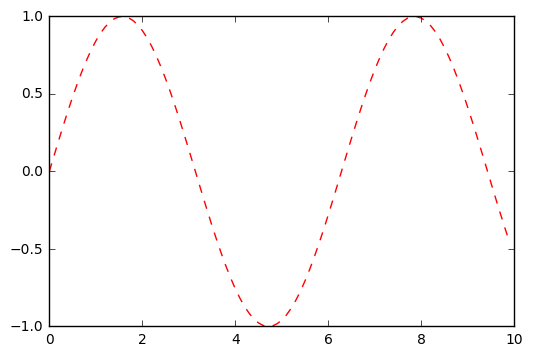

[output:9]

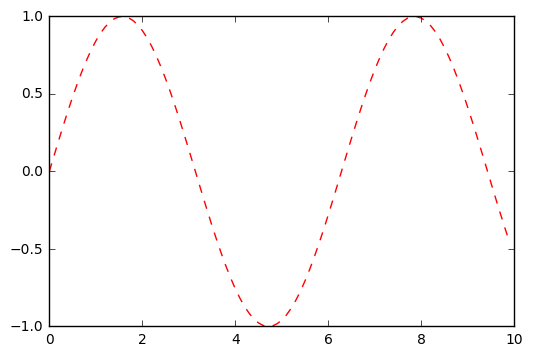

[output:10]

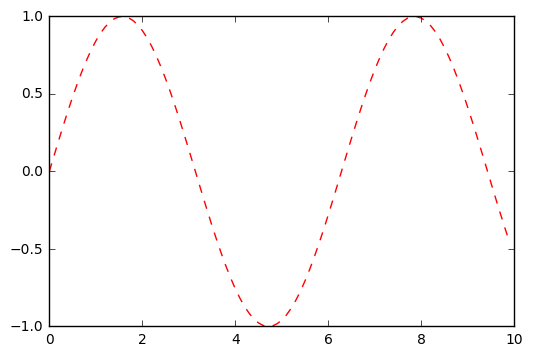

[output:11]

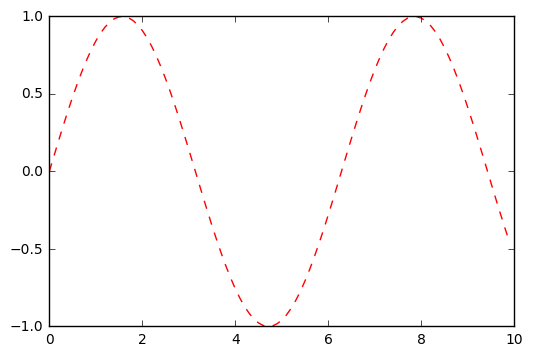

[output:12]

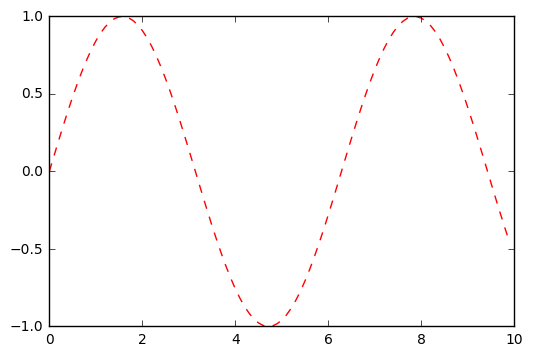

[output:13]

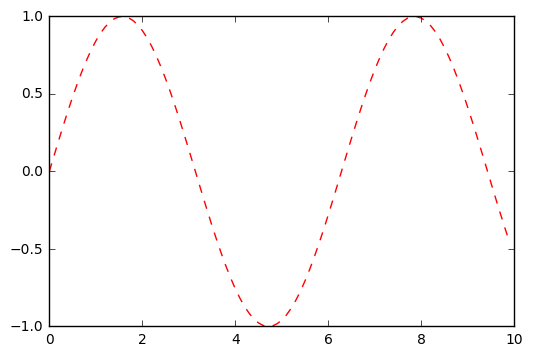

[output:14]

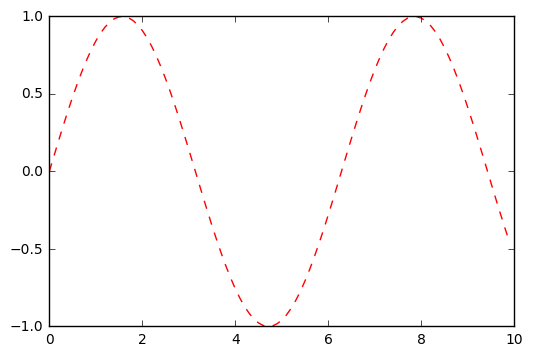

[output:15]

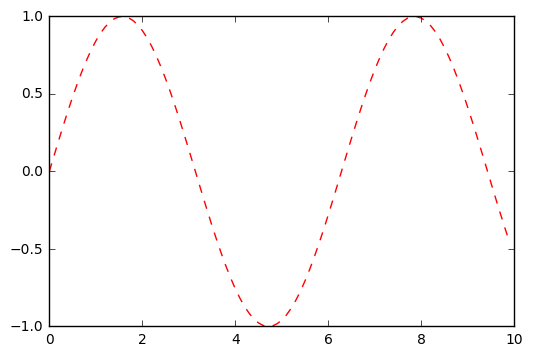

[output:16]

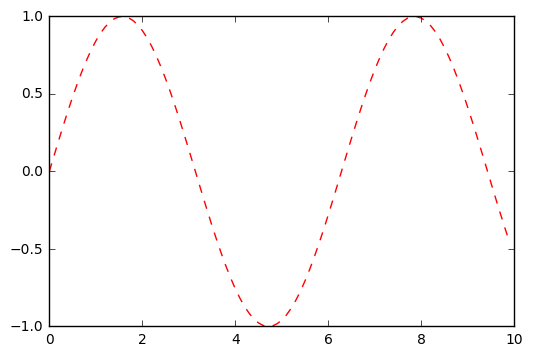

[output:17]

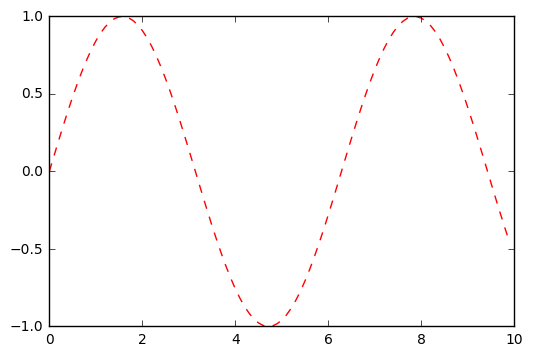

Out[0:3]: [<matplotlib.lines.Line2D at 0x2b8977bec2b0>]

Out[1:3]: [<matplotlib.lines.Line2D at 0x2b403b7f72b0>]

Out[2:3]: [<matplotlib.lines.Line2D at 0x2b91435494a8>]

Out[3:3]: [<matplotlib.lines.Line2D at 0x2ac1b03e58d0>]

Out[4:3]: [<matplotlib.lines.Line2D at 0x2aacd185f6a0>]

Out[5:3]: [<matplotlib.lines.Line2D at 0x2b0138bce898>]

Out[6:3]: [<matplotlib.lines.Line2D at 0x2b39217c18d0>]

Out[7:3]: [<matplotlib.lines.Line2D at 0x2b2ad12ad6d8>]

Out[8:3]: [<matplotlib.lines.Line2D at 0x2b90a62d18d0>]

Out[9:3]: [<matplotlib.lines.Line2D at 0x2afd294d26a0>]

Out[10:3]: [<matplotlib.lines.Line2D at 0x2b7fb60a5860>]

Out[11:3]: [<matplotlib.lines.Line2D at 0x2b77963a38d0>]

Out[12:3]: [<matplotlib.lines.Line2D at 0x2b76653d4860>]

Out[13:3]: [<matplotlib.lines.Line2D at 0x2b6ad0709898>]

Out[14:3]: [<matplotlib.lines.Line2D at 0x2aff97e50860>]

Out[15:3]: [<matplotlib.lines.Line2D at 0x2af9223e3668>]

Out[16:3]: [<matplotlib.lines.Line2D at 0x2afa161ac710>]

Out[17:3]: [<matplotlib.lines.Line2D at 0x2b4d49c73898>]

In [13]:
%px plot(a,sin(a),'r--')

### Constructs for embarrassingly parallel

In [16]:
from scipy.special import factorial

Parallel "map"

In [23]:
result = c[:].map(factorial, range(1000))

"Scatter" and "Gather"

In [26]:
c[:].scatter("a",'freedom liberty god bless america')

In [27]:
c[:]['a']

['fr',
 'ee',
 'do',
 'm ',
 'li',
 'be',
 'rt',
 'y ',
 'go',
 'd ',
 'bl',
 'es',
 's ',
 'am',
 'er',
 'i',
 'c',
 'a']

execute on specific targets (style #1)

In [31]:
%%px --targets 13:18
        a = a.upper()

In [34]:
''.join(c[:].gather("a"))

'freedom liberty god bless AMERICA'

or ... (style #2)

In [35]:
c[:].execute("a = a.upper()", 
                targets=[8,9])

<AsyncResult: execute:finished>

In [36]:
''.join(c[:].gather("a"))

'freedom liberty GOD bless AMERICA'

The engines preserve state accross notebooks. Try it ... File->New Notebook, and:


### IPyParallel Summary

#### Pros:

- Interactive
- Re-connectible
- Easy debugging output from engines
- Plays with MPI (though launch can be tricky)

#### Cons:
- No shared memory
- Slow for large data exchange
- 2 step execution
